In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv("events_with_uncertianty_case_study_2.csv")

In [3]:
df.head(2)

,event_type,duration,detection_time,start_time,end_time,id,source,quantity,rate,equipment_type,duration_lower,duration_upper,rate_lower,rate_upper
0,PRE,16.500000,2024-01-01 02:16:00,2024-01-01 02:16:00,2024-01-01 18:46:00,Event-1,Compressor-3,221.717605,13.437431,Compressor,0,33.000000,8.062458,8.062458
1,PRE,7.333333,2024-01-01 17:12:00,2024-01-01 17:12:00,2024-01-02 00:32:00,Event-2,Compressor-2,81.061078,11.053783,Compressor,0,14.666667,6.632270,6.632270


In [4]:
### total emissions and uncertainty from PREs
E_PREs = 0 
U_PREs_lower_list = []
U_PREs_upper_list = []
for _,row in df.iterrows():
    if row.event_type == "PRE":
        E_PREs += row.rate * row.duration
        U_PREs_lower_list.append(row.rate * row.duration * ((row.rate_lower/row.rate)**2 + (row.duration_lower/row.duration)**2)**0.5)
        U_PREs_upper_list.append(row.rate * row.duration * ((row.rate_upper/row.rate)**2 + (row.duration_upper/row.duration)**2)**0.5)

U_PREs_lower = 0 
U_PREs_upper = 0 
for upre in U_PREs_lower_list: 
    U_PREs_lower += upre**2

for upre in U_PREs_upper_list:
    U_PREs_upper += upre**2
print ("Total emissions from PREs and associated uncertainty are: ")
print (E_PREs, -U_PREs_lower**0.5, U_PREs_upper**0.5)

Total emissions from PREs and associated uncertainty are: 
12752.899311616686 -2434.553750186221 8472.495788120596


In [5]:
12752.899311616686 + 8472.495788120596

21225.39509973728

In [6]:
#95% confidence interval
print(890185.1218787591,"->" ,f"[{890185.1218787591-55587.91748871652},{890185.1218787591+80007.72328332221}]")

890185.1218787591 -> [834597.2043900426,970192.8451620813]


In [7]:
### total emissions and uncertainty
print(E_PREs + 890185.1218787591)
print(-(2434.553750186221**2 + 55587.91748871652**2)**0.5)
print((8472.495788120596**2 + 80007.72328332221**2)**0.5)

902938.0211903758
-55641.20436057169
80455.07423314195


In [8]:
902938.0211903758 + 80455.07423314195

983393.0954235177

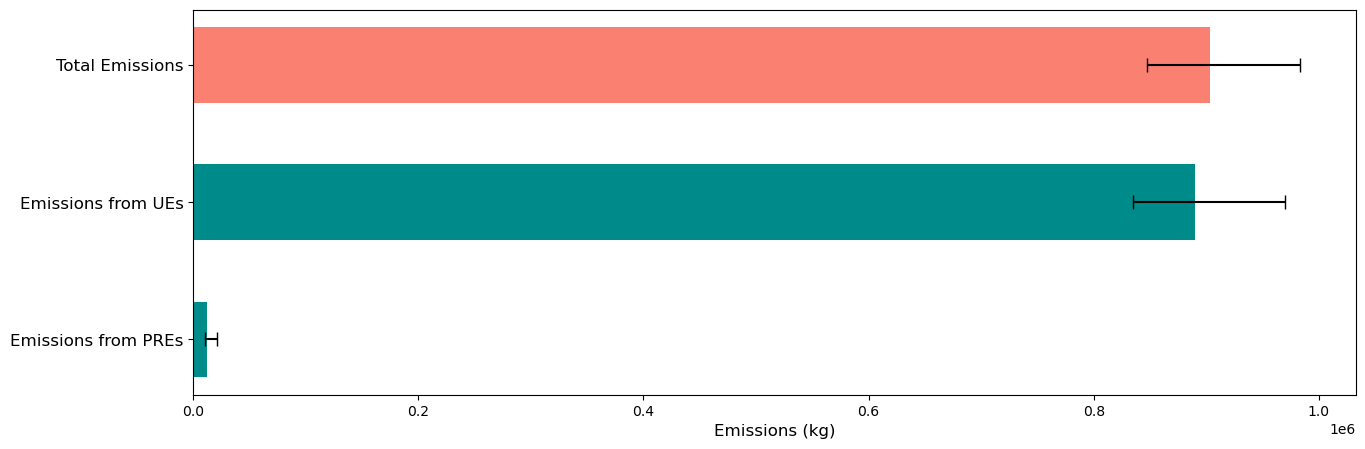

In [9]:
plt.figure(figsize=(15, 5))
categories = [ 'Emissions from PREs','Emissions from UEs', "Total Emissions"]
values = [12752.899311616686, 890185.1218787591, 902938.0211903758]
errors = [[2434.553750186221, 55587.91748871652, 55641.20436057169],
          [8472.495788120596, 80007.72328332221, 80455.07423314195]]
bar_width = 0.55
colors = ['darkcyan', 'darkcyan', 'salmon']
index = np.arange(len(categories))
plt.barh(index, values, xerr=errors, height=bar_width, color=colors , capsize=5)
#plt.ylabel('Categories')
plt.xlabel('Emissions (kg)', fontsize=12)
plt.yticks(index, categories, fontsize=12)
plt.savefig("reconciled_results_case_study_2.png",dpi=600)